### EMPLOYEE ATTRITION PREDICTOR

### PROBLEM STATEMENT:
This project understands how Employee Attrition (how likely an Employee is to stay/leave the company he is working in) is affected by Age,Department,Total working years, work-life balance, years at company, etc

### DATA COLLECTION
Dataset Source : [IBM HR Analytics (Kaggle)](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

#### 1. Importing libraries and reading the dataset

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv(r"../data/ibm_hr.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### 2. Perform Data Checks

##### 2.1 Number of rows and columns

In [79]:
df.shape

(1470, 35)

##### 2.2 Columns in the dataset

In [80]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### 2.3 Checking datatypes of columns

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### 2.4 Checking null values

In [82]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### 2.5 Checking duplicate values

In [83]:
df.duplicated().sum()

np.int64(0)

##### 2.6 Checking number of unique values in each column

In [84]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

##### 2.7 Dataset Statistics

In [85]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Observations:
1. The dataset contains 1470 rows and 35 columns
2. Target Column : Attrition (Yes/No) 
3. This is a classification problem
4. There are no null values in the dataset
5. The dataset does not contain any duplicate values

#### 3. Exploring the data

In [86]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [87]:
## Numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(f"There are {len(numeric_features)} Numeric features : {numeric_features}")
print(f"There are {len(categorical_features)} Categorical features : {categorical_features}")

There are 26 Numeric features : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
There are 9 Categorical features : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


##### 3.1 Categories of variables in categorical features

In [88]:
print('Categories of variables:\n')
for col in categorical_features:
    print(f"{col} : {df[col].unique()}\n")

Categories of variables:

Attrition : ['Yes' 'No']

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department : ['Sales' 'Research & Development' 'Human Resources']

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender : ['Female' 'Male']

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus : ['Single' 'Married' 'Divorced']

Over18 : ['Y']

OverTime : ['Yes' 'No']



##### Observations:
1. Apply binary encoding to : Attrition, Gender, Overtime
2. Apply One Hot Encoding to : BusinessTravel, Department, EducationField, JobRole, MaritalStatus
3. Drop the Over18 column as all employees are over 18 years of age.


In [89]:
## drop Over18 column
df.drop(columns=['Over18'],axis=1,inplace=True)

In [90]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### 4. Visualizations

##### 4.1.1 Understanding the distribution of target variable : Attrition

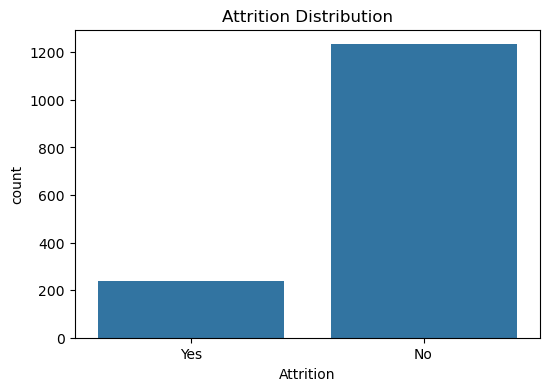

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [91]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="Attrition")
plt.title('Attrition Distribution')
plt.show()

attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

##### 4.1.2 Gender vs Attrition

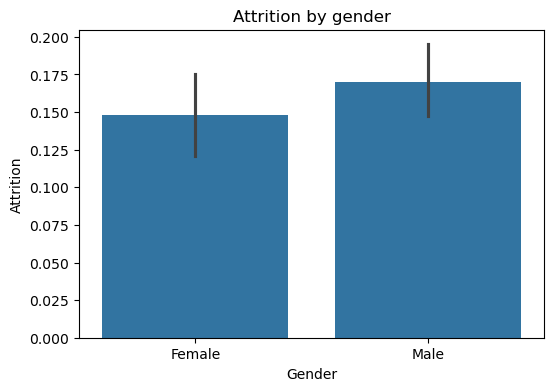

In [92]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender",y=df['Attrition'].apply(lambda x:1 if x=="Yes" else 0),data=df)
plt.title('Attrition by gender')
plt.show()

##### 4.1.3 BusinessTravel vs Attrition

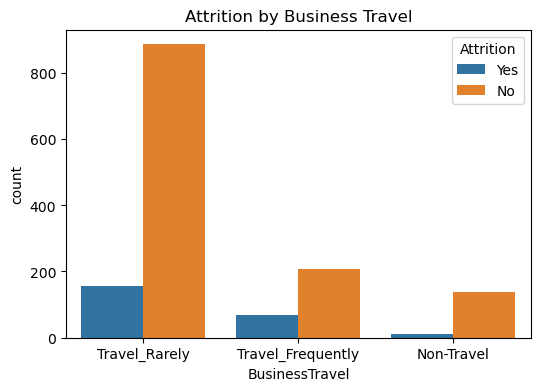

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='BusinessTravel',hue='Attrition')
plt.title("Attrition by Business Travel")
plt.show()

##### 4.1.4 Department vs Attrition

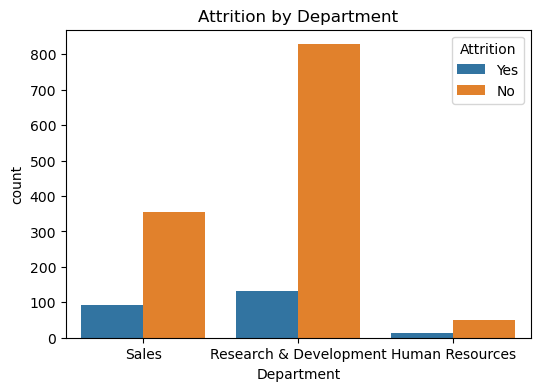

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()

##### 4.1.5 EducationField vs Attrition

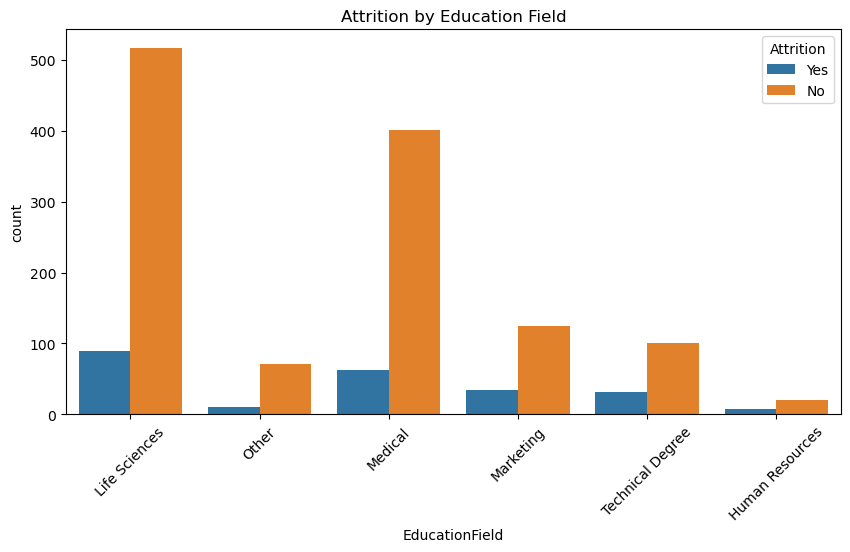

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x="EducationField", hue="Attrition", data=df)
plt.title("Attrition by Education Field")
plt.xticks(rotation=45)
plt.show()

##### 4.1.6 JobRole vs Attrition

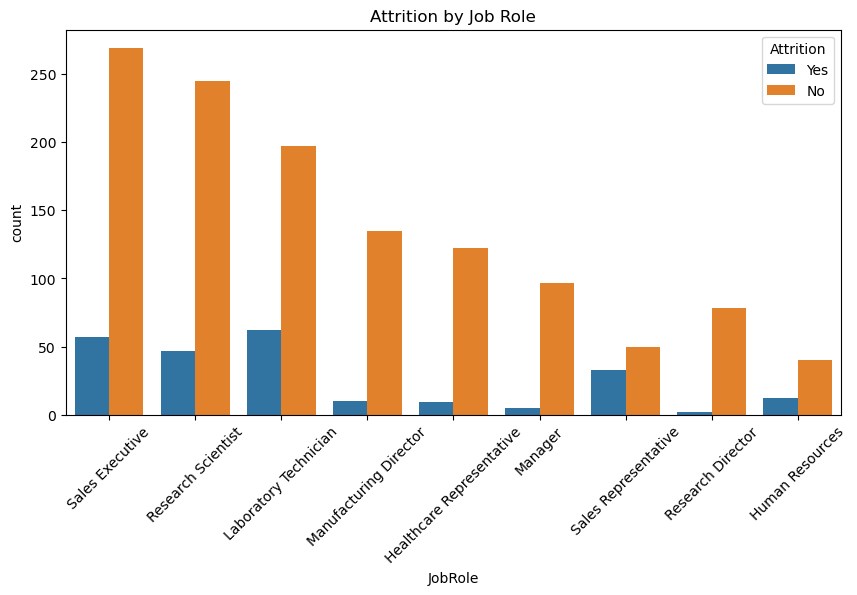

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

##### 4.1.7 Marital Status vs Attrition

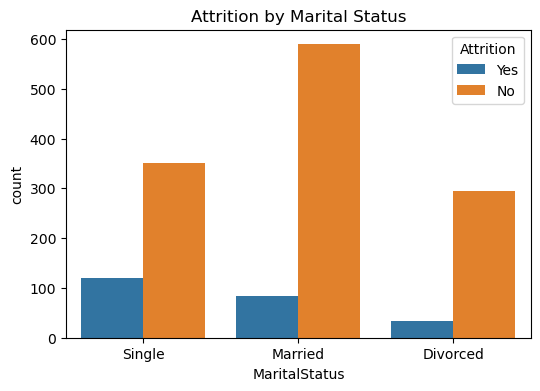

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df)
plt.title("Attrition by Marital Status")
plt.show()

##### 4.1.8 Overtime vs Attrition

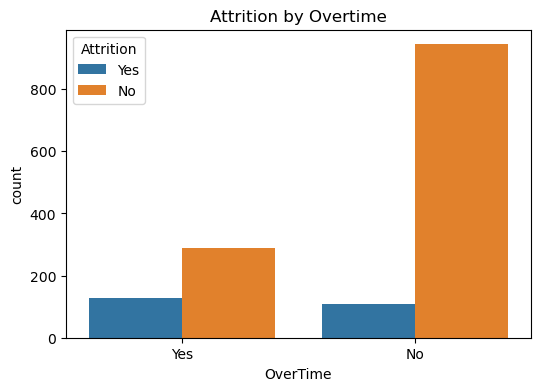

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by Overtime")
plt.show()

##### 4.1.9 MonthlyIncome vs Attrition

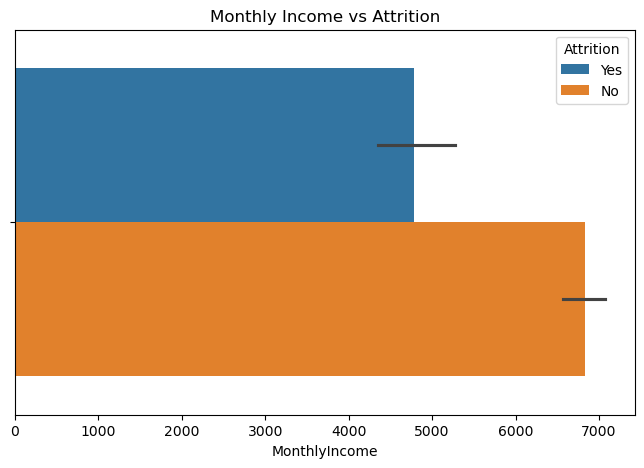

In [99]:
plt.figure(figsize=(8,5))
sns.barplot(hue="Attrition", x="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

##### 4.2.1 YearsAtCompany vs Attrition

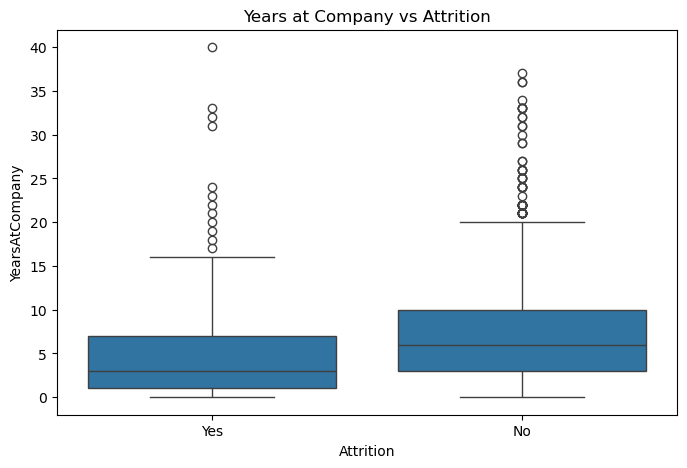

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df)
plt.title("Years at Company vs Attrition")
plt.show()

##### 4.2.2 Age distribution

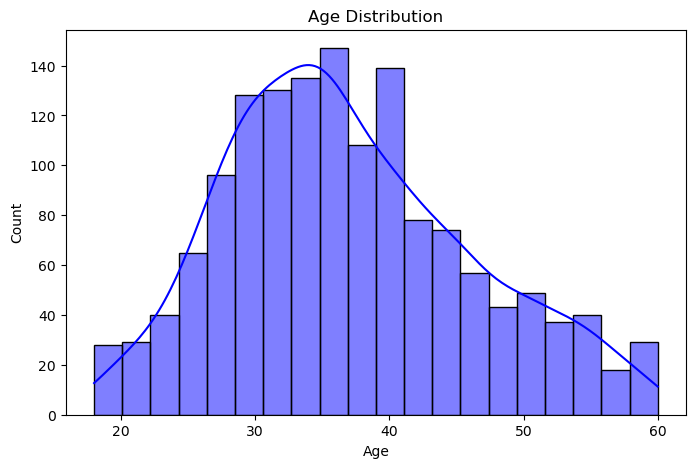

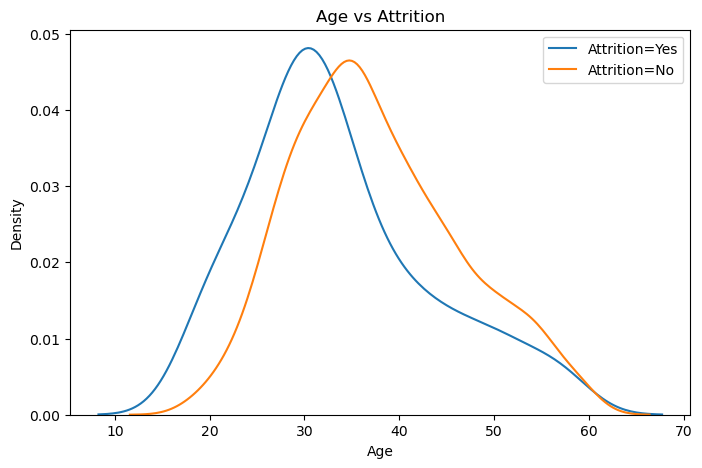

In [101]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Attrition']=="Yes", "Age"], label="Attrition=Yes")
sns.kdeplot(df.loc[df['Attrition']=="No", "Age"], label="Attrition=No")
plt.title("Age vs Attrition")
plt.legend()
plt.show()

##### 4.2.3 Correlation Heatmap

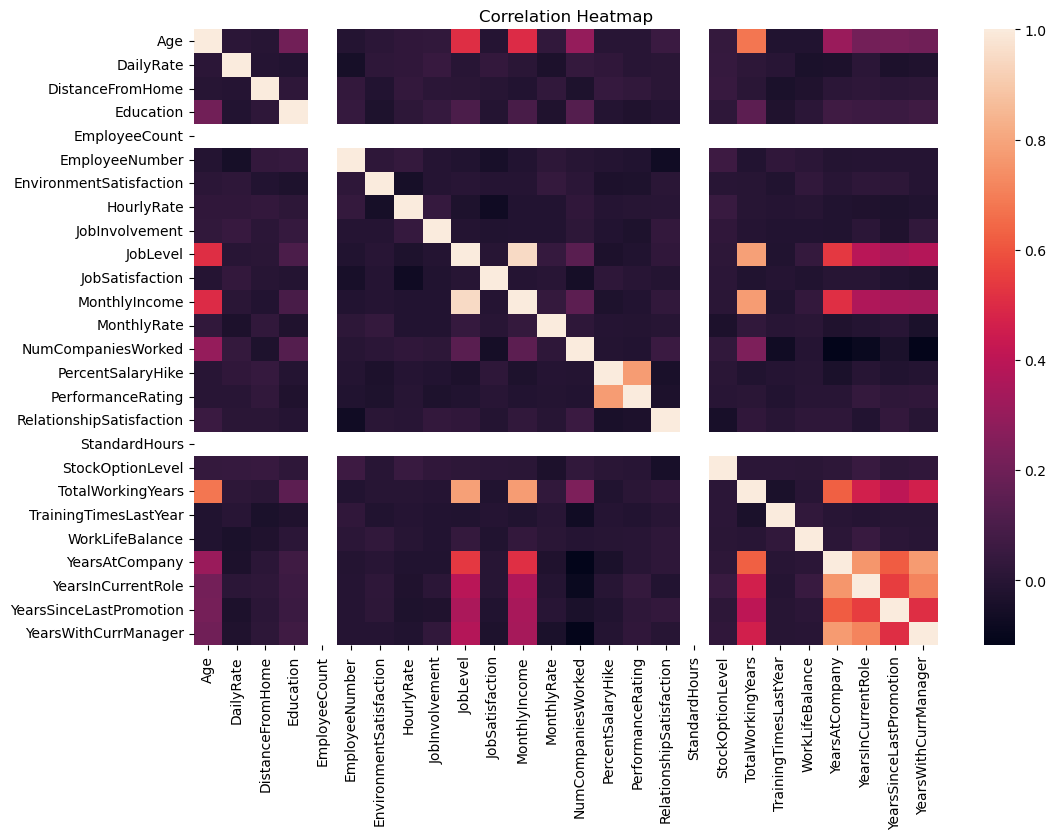

In [102]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap")
plt.show()

##### 4.2.4 Pairplot

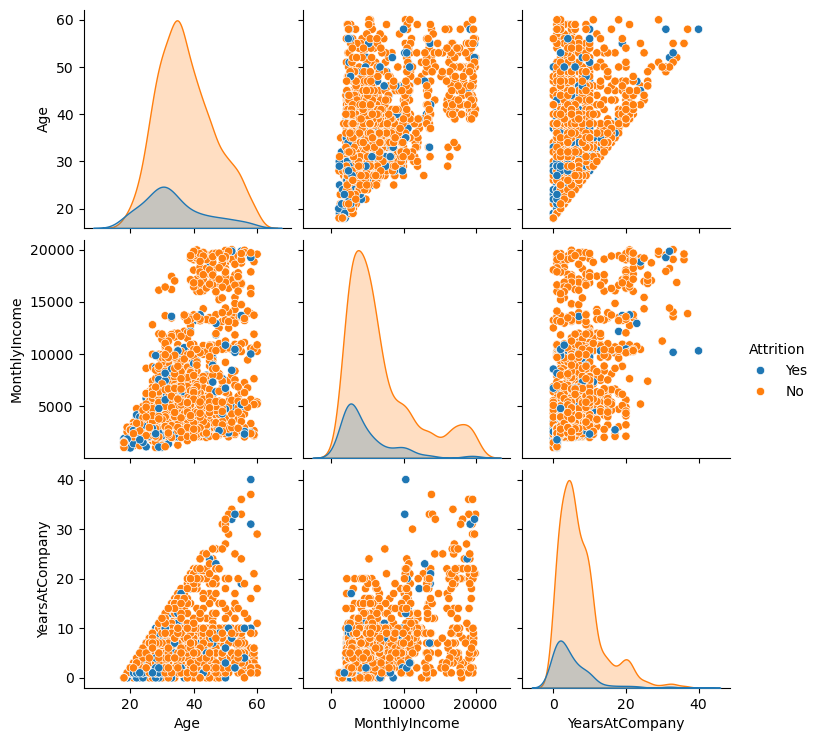

In [103]:
sns.pairplot(df[['Age','MonthlyIncome','YearsAtCompany','Attrition']], 
             hue="Attrition", diag_kind="kde")
plt.show()

##### Insights:
1. The dataset is imbalanced - 16% 'No' and 84% 'Yes'
2. Employees working overtime have a much higher attrition rate compared to those who don't
3. Employees with lower MonthlyIncome are more likely to leave
4. Younger Employees (mid 20s to early 30s) have higher attrition risk, Older employees are more stable and less likely to leave
5. Sales executive, Laboratory Technicians, Research scientists have higher attrition risk compared to Managers or Research Scientists
6. Employees with frequent travel have higher attrition risk
7. Single Employees show higher attrition risk
8. Most attrition happens within first few years of employment

#### 5. Train test split

In [104]:
## importing train test split
from sklearn.model_selection import train_test_split

In [105]:
## dependent and independent features
X = df.drop("Attrition",axis=1)
y = df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0) ##binary encoding

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

##### 5.1 Encoding the categorical features

##### 5.1.1 Binary Encoding

In [107]:
## Gender
X_train['Gender'] = X_train['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
X_test['Gender'] = X_test['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

In [108]:
## OverTime
X_train['OverTime']= X_train['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)
X_test['OverTime'] = X_test['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)

##### 5.1.2 OneHot Encoding

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

binary_cols = ["Gender", "OverTime"]
ohe_cols = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
numeric_cols = [col for col in X_train.columns if col not in binary_cols + ohe_cols]

preprocessor = ColumnTransformer(
    transformers=[("cat",OneHotEncoder(handle_unknown="ignore"),ohe_cols)],
    remainder="passthrough"
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(ohe_cols)
all_features = list(ohe_feature_names) + numeric_cols + binary_cols

X_train = pd.DataFrame(X_train_encoded,columns=all_features,index=X_train.index)
X_test = pd.DataFrame(X_test_encoded,columns=all_features,index=X_test.index)

##### 5.1 Handling Class Imbalance 
using RandomOverSampler and SMOTE

In [110]:
X_train

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,OverTime
1194,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,1225.0,2.0,4.0,1.0,1676.0,2.0,0.0,47.0,4.0,4.0,2.0,15972.0,21086.0,6.0,0.0,14.0,3.0,3.0,80.0,3.0,29.0,2.0,3.0,3.0,2.0,1.0,2.0
128,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,594.0,2.0,1.0,1.0,169.0,3.0,1.0,100.0,3.0,1.0,4.0,2523.0,19299.0,0.0,0.0,14.0,3.0,3.0,80.0,1.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0
810,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,46.0,406.0,3.0,1.0,1.0,1124.0,1.0,1.0,52.0,3.0,4.0,3.0,17465.0,15596.0,3.0,0.0,12.0,3.0,4.0,80.0,1.0,23.0,3.0,3.0,12.0,9.0,4.0,9.0
478,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,622.0,13.0,1.0,1.0,645.0,2.0,1.0,40.0,3.0,1.0,3.0,2096.0,26376.0,1.0,0.0,11.0,3.0,3.0,80.0,0.0,7.0,1.0,3.0,7.0,4.0,0.0,6.0
491,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,1001.0,9.0,5.0,1.0,663.0,4.0,1.0,72.0,3.0,2.0,3.0,5679.0,19627.0,3.0,1.0,13.0,3.0,2.0,80.0,1.0,10.0,3.0,3.0,8.0,7.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,23.0,427.0,7.0,3.0,1.0,1702.0,3.0,1.0,99.0,3.0,1.0,4.0,2275.0,25103.0,1.0,1.0,21.0,4.0,2.0,80.0,1.0,3.0,2.0,3.0,3.0,2.0,0.0,2.0
963,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,38.0,1009.0,2.0,2.0,1.0,1355.0,2.0,0.0,31.0,3.0,2.0,1.0,6893.0,19461.0,3.0,0.0,15.0,3.0,4.0,80.0,1.0,11.0,3.0,3.0,7.0,7.0,1.0,7.0
734,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,217.0,8.0,1.0,1.0,1019.0,2.0,1.0,94.0,1.0,1.0,1.0,2451.0,6881.0,1.0,0.0,15.0,3.0,1.0,80.0,1.0,4.0,3.0,2.0,4.0,3.0,1.0,1.0
1315,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,36.0,430.0,2.0,4.0,1.0,1847.0,4.0,0.0,73.0,3.0,2.0,2.0,6962.0,19573.0,4.0,1.0,22.0,4.0,4.0,80.0,1.0,15.0,2.0,3.0,1.0,0.0,0.0,0.0


In [111]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())


Before: Attrition
0    986
1    190
Name: count, dtype: int64
After: Attrition
0    986
1    986
Name: count, dtype: int64


#### 6. Model Training

In [112]:
## libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import f1_score,roc_auc_score,make_scorer

In [113]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0, 1.5]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.1, 0.2]
    }
}

scoring = {"F1": make_scorer(f1_score), "ROC-AUC": "roc_auc"}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print("="*60)
    print(f"Training: {name}")
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring=scoring,
        refit="F1",   # optimize for F1-score
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train_res, y_train_res)
    
    # Best estimator
    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"Test F1-score: {f1:.4f}")
    print(f"Test ROC-AUC: {roc_auc:.4f}")
    
    results.append([name, grid.best_params_, f1, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Best Params", "F1-score", "ROC-AUC"])
results_df = results_df.sort_values(by="F1-score", ascending=False)

print("\n=== Final Model Comparison ===")
print(results_df)

Training: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Test F1-score: 0.4885
Test ROC-AUC: 0.7939
Training: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Test F1-score: 0.2148
Test ROC-AUC: 0.5444
Training: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Test F1-score: 0.3093
Test ROC-AUC: 0.5890
Training: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Test F1-score: 0.3607
Test ROC-AUC: 0.7881
Training: AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Test F1-score: 0.4615
Test ROC-AUC: 0.7963
Training: XGBoost
Fitting 5 folds for each of 18 candidates,

c:\Users\smrut\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
